In [1]:
import pandas as pd
import numpy as np
random_state = np.random.RandomState(2925)
np.random.seed(2925) # for reproducibility

The ensemble weights were obtained via CV with the **minimize** function of **scipy.optimize** library

# Functions

In [2]:
def make_country_df(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds,  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [3]:
def fopt_pred(pars, Ym):
    pars = pars/pars.sum()
    Y=np.dot(np.concatenate(Ym,axis=1),np.atleast_2d(pars).T)
    return Y

# Data Processing

In [4]:
datafiles = {}
datafiles['out'] = 'predictions/final_submission'

In [5]:
def read_test_train():

    data_paths = {'A': {'train': 'data/A_hhold_train.csv', 
                        'test':  'data/A_hhold_test.csv'}, 

                  'B': {'train': 'data/B_hhold_train.csv', 
                        'test':  'data/B_hhold_test.csv'}, 

                  'C': {'train': 'data/C_hhold_train.csv', 
                        'test':  'data/C_hhold_test.csv'}}

    # load training data
    a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
    b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
    c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

    ay_train = np.ravel(a_train.poor)
    by_train = np.ravel(b_train.poor)
    cy_train = np.ravel(c_train.poor)
    aX_train = a_train['country'].copy()
    bX_train = b_train['country'].copy()
    cX_train = c_train['country'].copy()
    
    # load test data
    a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
    b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
    c_test = pd.read_csv(data_paths['C']['test'], index_col='id')
    # process the test data
    aX_test = a_test['country'].copy()
    bX_test = b_test['country'].copy()
    cX_test = c_test['country'].copy()
    return aX_train,ay_train, aX_test,bX_train,by_train, bX_test,cX_train,cy_train, cX_test

In [6]:
aX_train,aY_train, aX_test,bX_train,bY_train, bX_test,cX_train,cY_train, cX_test = read_test_train()

# A

In [9]:
models_A = ['predictions/Keras_M03_F09','predictions/KerasUB_M03_F11','predictions/KerasUB_M02_F02','predictions/KerasUB_M03_F02','predictions/KerasUB_M03_F08','predictions/Light_M01_F08','predictions/Light_M01_F09','predictions/Light_M01_F10','predictions/Light_M01_F11']

aYp_test = []

for file in models_A:
    print(file)
    testd = pd.read_csv(file + '__A_test.csv')
    aYp_test.append(np.atleast_2d(testd[testd['country']=='A']['poor'].values).T)


predictions/Keras_M03_F09
predictions/KerasUB_M03_F11
predictions/KerasUB_M02_F02
predictions/KerasUB_M03_F02
predictions/KerasUB_M03_F08
predictions/Light_M01_F08
predictions/Light_M01_F09
predictions/Light_M01_F10
predictions/Light_M01_F11


# B

In [10]:
models_B = ['predictions/Light_M01_F15','predictions/KerasUB_M03_F11','predictions/Keras_M03_F08','predictions/KerasUB_M03_F02','predictions/Light_M01_F09','predictions/Light_M01_F10','predictions/Light_M01_F11']

bYp_train = []
bYp_test = []

for file in models_B:
    print(file)
    testd = pd.read_csv(file + '__B_test.csv')
    bYp_test.append(np.atleast_2d(testd[testd['country']=='B']['poor'].values).T)

predictions/Light_M01_F15
predictions/KerasUB_M03_F11
predictions/Keras_M03_F08
predictions/KerasUB_M03_F02
predictions/Light_M01_F09
predictions/Light_M01_F10
predictions/Light_M01_F11


# C

In [11]:
models_C = ['predictions/Keras_M03_F09','predictions/Light_M01_F09','predictions/Light_M01_F11']

cYp_test = []

for file in models_C:
    print(file)
    testd = pd.read_csv(file + '__C_test.csv')
    cYp_test.append(np.atleast_2d(testd[testd['country']=='C']['poor'].values).T)

predictions/Keras_M03_F09
predictions/Light_M01_F09
predictions/Light_M01_F11


# Submission

In [16]:
pcvA = np.array([1.54650548e-01, 6.99449920e-02, 2.18102764e-17, 7.77701279e-03, 2.96078796e-01, 1.53370409e-01, 1.31249388e-01, 8.78751040e-02, 9.90537502e-02])
pcvB = np.array([4.64149729e-01, 1.50859518e-01, 7.09274904e-02, 5.18305551e-02, 5.27863510e-17, 1.96756519e-01, 6.54761887e-02])
pcvC = np.array([0.03359332, 0.55776565, 0.40864103])

In [17]:
aYt_pred =  fopt_pred(pcvA, aYp_test)
bYt_pred =  fopt_pred(pcvB, bYp_test)
cYt_pred =  fopt_pred(pcvC, cYp_test)

In [18]:
# convert preds to data frames
a_sub = make_country_df(aYt_pred.flatten(), aX_test, 'A')
b_sub = make_country_df(bYt_pred.flatten(), bX_test, 'B')
c_sub = make_country_df(cYt_pred.flatten(), cX_test, 'C')

In [54]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [20]:
submission.to_csv(datafiles['out']+'test.csv')

# Check replication

In [55]:
submission = submission
submission.head()

,country,poor
id,,
418,A,0.957972
41249,A,0.000848
16205,A,0.829394
97501,A,0.000820
67756,A,0.974931


In [59]:
#df_sub = pd.read_csv('./predictions/E18_M18test.csv')
#df_sub = df_sub.set_index('id')
df_sub.head()

,country,poor
id,,
418,A,0.958912
41249,A,0.000851
16205,A,0.843510
97501,A,0.000821
67756,A,0.976275


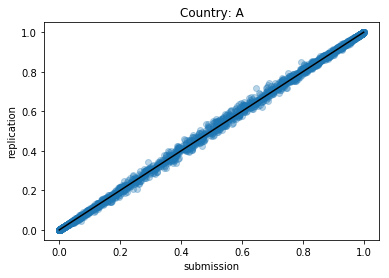

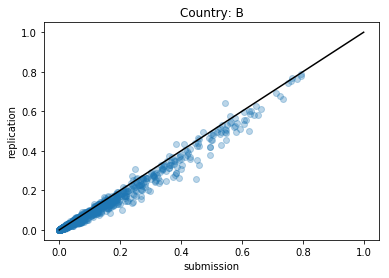

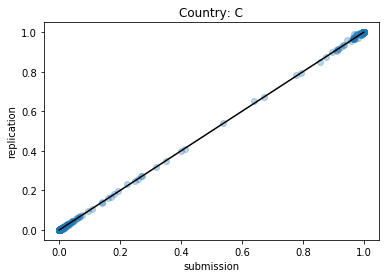

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
for c in submission.country.unique():
    idx = submission.country==c
    plt.plot(df_sub.loc[idx].poor, submission.loc[idx].poor,  'o', alpha=0.3)
    plt.plot([0,1], [0,1], '-k')
    plt.title('Country: %s' % c)
    plt.xlabel('submission')
    plt.ylabel('replication')
    plt.show()